# Set sub-grid widths for selected channels

In [3]:
import os
import sys
sys.path.insert(0,os.path.abspath('src/'))

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import numpy as np
import xarray as xr

import os
from datetime import date

import matplotlib.pyplot as plt
from topo_edit_util import inspect_topo, create_soc_topo_table

## Get input topography data set

In [4]:
grid = 'tx2_3v2'
topo = 'SRTM15_V2.4'
nsub = 'sub150'
topo_src = 'srtm'
edit = 'edit4'
case = 'SmL1.0_C1.0'
depth_var_in = 'D_interp'

path_root = './'

In [5]:
path_in = path_root 

file_in = 'topo.' + nsub + '.' + grid + '.' + topo_src + '.' + edit + '.' + case + '.nc'
print(path_in+file_in)
dss = xr.open_dataset(path_in+file_in)

./topo.sub150.tx2_3v2.srtm.edit4.SmL1.0_C1.0.nc


In [6]:
dss

<xarray.Dataset>
Dimensions:     (lonh: 540, lath: 480, lonq: 541, latq: 481)
Coordinates:
  * lonh        (lonh) float64 -286.7 -286.0 -285.3 -284.7 ... 71.33 72.0 72.67
  * lath        (lath) float64 -81.56 -81.46 -81.36 -81.26 ... 89.33 89.6 89.86
  * lonq        (lonq) float64 -287.0 -286.3 -285.7 -285.0 ... 71.67 72.33 73.0
  * latq        (latq) float64 -81.61 -81.51 -81.41 -81.31 ... 89.46 89.72 89.91
Data variables: (12/15)
    geolon      (lath, lonh) float64 ...
    geolat      (lath, lonh) float64 ...
    geolonb     (latq, lonq) float64 ...
    geolatb     (latq, lonq) float64 ...
    z           (lath, lonh) float32 ...
    ocn_frac    (lath, lonh) float32 ...
    ...          ...
    D2_mean     (lath, lonh) float32 ...
    D_min       (lath, lonh) float32 ...
    D_max       (lath, lonh) float32 ...
    hand_edits  (lath, lonh) int32 ...
    orig_mask   (lath, lonh) int32 ...
    D_interp    (lath, lonh) float32 ...
Attributes:
    Description:             Ocean Topography Statistics on MOM6 Grid
    Creator:                 Frank Bryan (bryan@ucar.edu)
    Created:                 20240216
    Generating Code:         create_model_topo.f90
    Model Grid Version:      tx2_3v2
    Source Topography Data:  /glade/campaign/cgd/oce/datasets/obs/SRTM/SRTM15...
    Edit History:            Hand Edit + Lake Fill 02/16/2024

In [7]:
soc_table = create_soc_topo_table()

## Set up output files

In [8]:
today = date.today()

path_out = path_in
file_out_chan = 'Channels_' + grid + '_' + today.strftime("%m.%d.%Y") + '.txt'
print('channel width file : ',file_out_chan)

fmt_out = "{0:s}, {1:8.2f}, {2:8.2f}, {3:8.2f}, {4:8.2f}, {5:10.1f} ! {6:s}\n"

channel width file :  Channels_tx2_3v2_02.16.2024.txt


## Selected Straits

### Strait of Gibralter

{'lat': 35.92, 'lon': -5.75, 'depth': 284.0, 'width': 10.0}


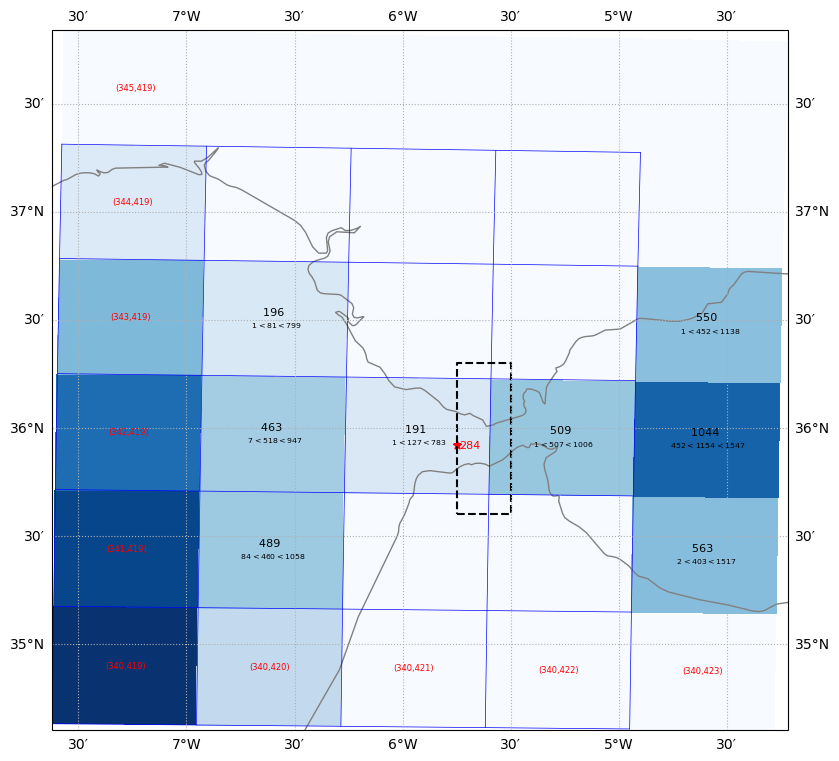

In [9]:
place = 'St. of Gibralter'
print(soc_table[place])
lon_beg = -7
lon_end = -4
lat_beg = 35
lat_end = 38
zmax = 1300.

ax=inspect_topo(dss,depth_var_in,lon_beg,lon_end,lat_beg,lat_end,zmax,place=soc_table[place])

lon1 = -5.75
lat1 = 35.6
lon2 = -5.5
lat2 = 36.3
xbox = [lon1, lon2, lon2, lon1, lon1]
ybox = [lat1, lat1, lat2, lat2, lat1]
ax.plot(xbox,ybox,linestyle='dashed',color='k')


In [10]:
width = 12.0e3
print('width = ',width)

with open(path_out+file_out_chan,'w') as f:
    line = fmt_out.format("U_width",lon1,lon2,lat1,lat2,width,place)
    f.write(line)

width =  12000.0


### Bosphorus

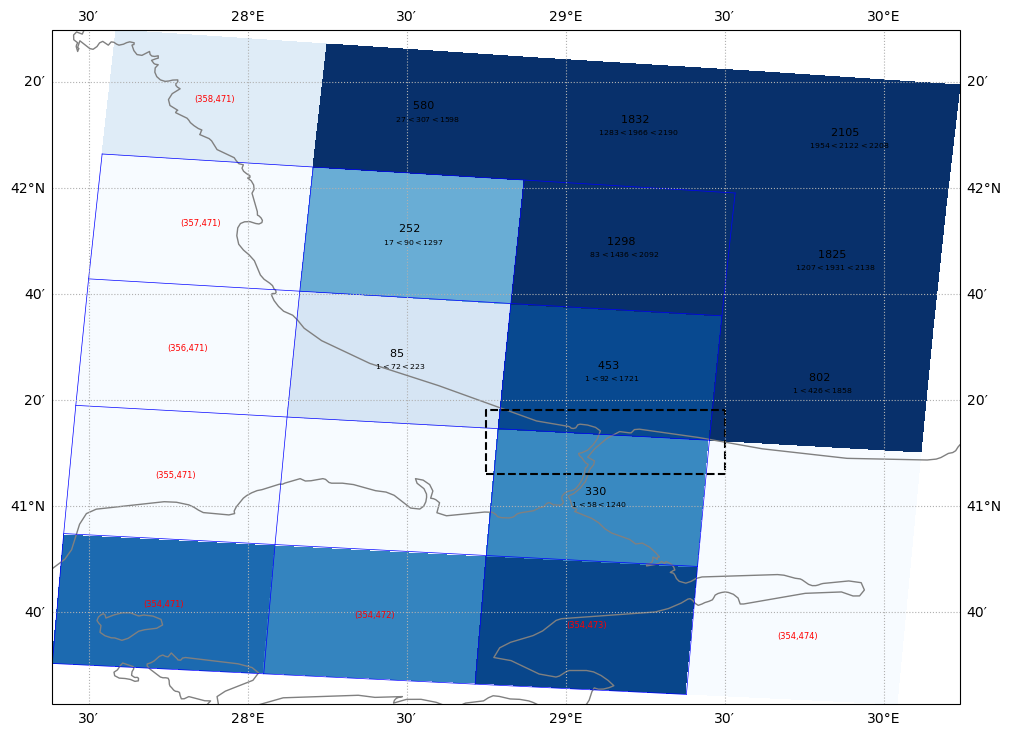

In [11]:
## Black Sea / Bosphorus
place = 'Bosphorus St.'
lon_beg = 28
lon_end = 30.5
lat_beg = 40.5
lat_end = 42.5
zmax = 500.


ax=inspect_topo(dss,depth_var_in,lon_beg,lon_end,lat_beg,lat_end,zmax)

lon1 = 28.75
lat1 = 41.1
lon2 = 29.5
lat2 = 41.3
xbox = [lon1, lon2, lon2, lon1, lon1]
ybox = [lat1, lat1, lat2, lat2, lat1]
ax.plot(xbox,ybox,linestyle='dashed',color='k')


In [12]:
width = 5.0e3
print('width = ',width)

with open(path_out+file_out_chan,'a') as f:
    line = fmt_out.format("V_width",lon1,lon2,lat1,lat2,width,place)
    f.write(line)

width =  5000.0


### Dardanelles

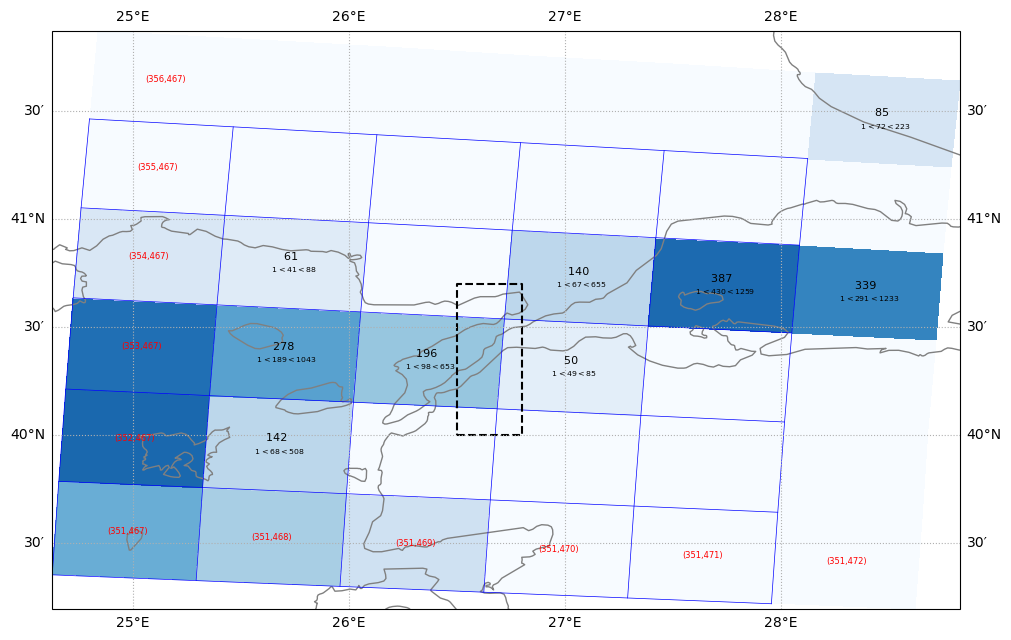

In [13]:
place = 'Dardanelles'
lon_beg = 25
lon_end = 29
lat_beg = 39.5
lat_end = 42
zmax = 500.

ax=inspect_topo(dss,depth_var_in,lon_beg,lon_end,lat_beg,lat_end,zmax)

lon1 = 26.5
lat1 = 40.
lon2 = 26.8
lat2 = 40.7
xbox = [lon1, lon2, lon2, lon1, lon1]
ybox = [lat1, lat1, lat2, lat2, lat1]
ax.plot(xbox,ybox,linestyle='dashed',color='k')


In [14]:
width = 5.0e3
print('width = ',width)

with open(path_out+file_out_chan,'a') as f:
    line = fmt_out.format("U_width",lon1,lon2,lat1,lat2,width,place)
    f.write(line)

width =  5000.0


### Lombok Strait

{'lat': -8.9, 'lon': 116.0, 'depth': 350.0, 'width': 22.0}


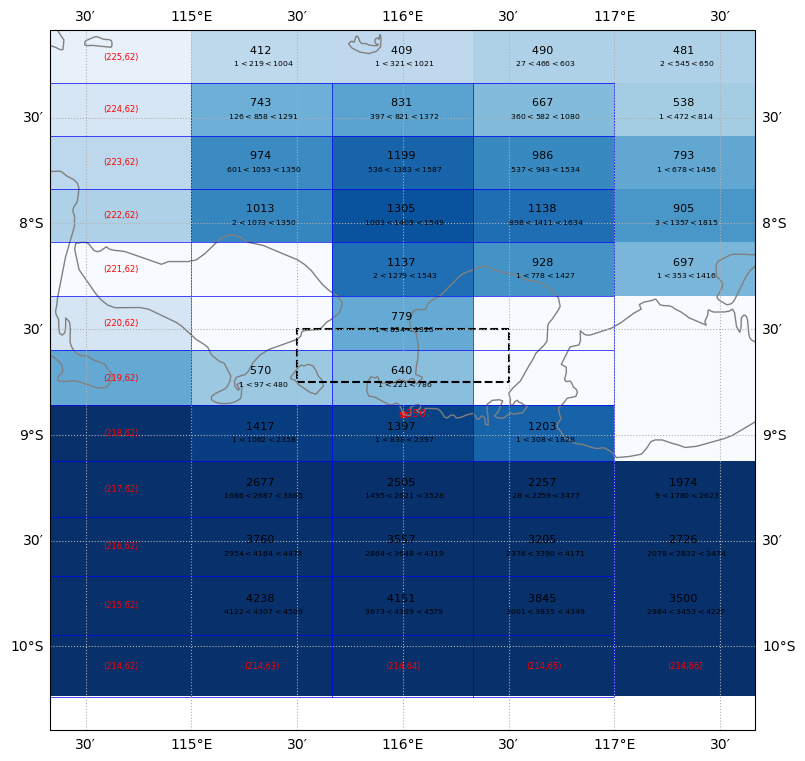

In [15]:
place = 'Lombok St.'
print(soc_table[place])
lon_beg = -245.5
lon_end = -242.
lat_beg = -10
lat_end = -7.
zmax = 1500.

ax=inspect_topo(dss,depth_var_in,lon_beg,lon_end,lat_beg,lat_end,zmax,place=soc_table[place])

lon1 = 115.5
lon2 = 116.5
lat1 = -8.75
lat2 = -8.5
xbox = [lon1, lon2, lon2, lon1, lon1]
ybox = [lat1, lat1, lat2, lat2, lat1]
ax.plot(xbox,ybox,linestyle='dashed',color='k')


In [16]:
width = soc_table[place]['width']*1000.
print('width = ',width)

with open(path_out+file_out_chan,'a') as f:
    line = fmt_out.format("V_width",lon1,lon2,lat1,lat2,width,place)
    f.write(line)

width =  22000.0


### Bab El-Mandeb

{'lat': 13.73, 'lon': 42.5, 'depth': 137.0, 'width': 32.0}


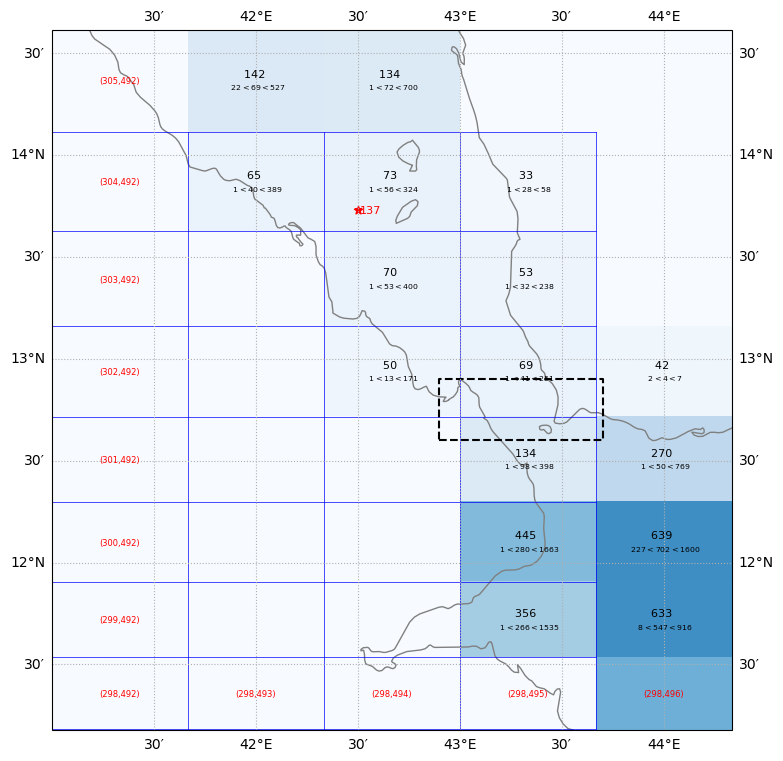

In [17]:
place = 'Bab El-Mandeb'
print(soc_table[place])
lon_beg = 41.5
lon_end = 44.5
lat_beg = 11.5
lat_end = 14.75
zmax = 1000.

ax=inspect_topo(dss,depth_var_in,lon_beg,lon_end,lat_beg,lat_end,zmax,place=soc_table[place])

lon1 = 42.9
lon2 = 43.7
lat1 = 12.6
lat2 = 12.9
xbox = [lon1, lon2, lon2, lon1, lon1]
ybox = [lat1, lat1, lat2, lat2, lat1]
ax.plot(xbox,ybox,linestyle='dashed',color='k')


In [18]:
width = soc_table[place]['width']*1000.
print('width = ',width)

with open(path_out+file_out_chan,'a') as f:
    line = fmt_out.format("V_width",lon1,lon2,lat1,lat2,width,place)
    f.write(line)

width =  32000.0
